In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
# Loading in data
all_data = pd.read_csv("dem_suic_data_wRisk.csv")
all_data.head()

,id,County_Names,num_households,percent_households_by_type_total_households,num_families,percent_households_by_type_total_households_family_households_(families),num_families_with_minors,percent_families_with_minors,num_families_with_married_couple,percent_families_with_married_couple,...,percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_under_18_years_related_children_of_the_householder_under_18_years_related_children_of_the_householder_5_to_17_years,percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_18_years_and_over,percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_18_to_64_years,percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_65_years_and_over,percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_65_years_and_over_people_in_families,percent_percentage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_65_years_and_over_unrelated_individuals_15_years_and_over,Suicide_Counts,County_of_occurrence,Risk_Type,Suicide_Rate
0,0500000US06001,Alameda County,558907.0,558907.0,368905.0,66.0,174479.0,31.2,270195.0,48.3,...,14.7,11.8,12.2,9.2,9.1,25.9,138.0,1.0,0.0,8.891219
1,0500000US06005,Amador County,13925.0,13925.0,9402.0,67.5,2917.0,20.9,7704.0,55.3,...,20.7,10.8,13.3,5.0,8.8,29.5,7.0,5.0,1.0,21.307683
2,0500000US06007,Butte County,85318.0,85318.0,50963.0,59.7,20238.0,23.7,36475.0,42.8,...,22.8,21.3,24.7,8.3,14.9,40.5,39.0,7.0,1.0,17.960515
3,0500000US06009,Calaveras County,18060.0,18060.0,12144.0,67.2,3481.0,19.3,9906.0,54.9,...,12.4,12.5,14.8,6.9,8.6,30.0,20.0,9.0,1.0,45.199782
4,0500000US06011,Colusa County,6966.0,6966.0,5375.0,77.2,2563.0,36.8,4010.0,57.6,...,20.1,12.1,12.6,9.7,13.1,29.6,2.0,11.0,0.0,9.449563


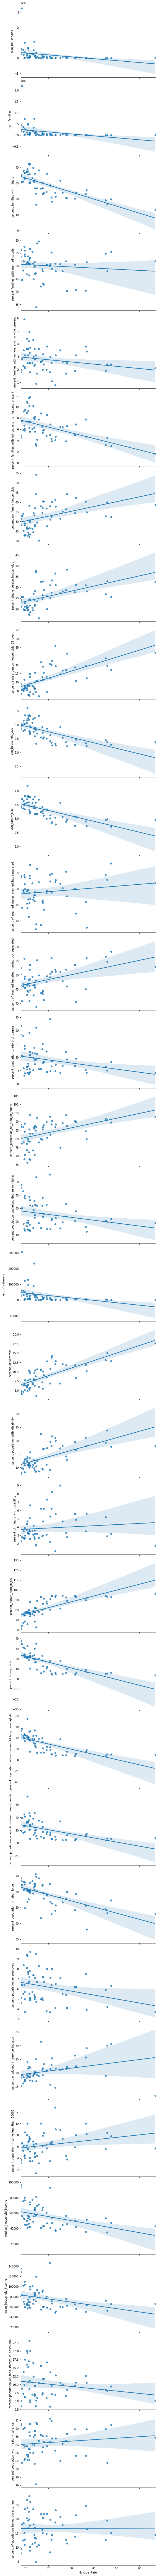

In [33]:
# Looking at how each feature relates to the counties' suicide rates
sns.pairplot(all_data, x_vars='Suicide_Rate', y_vars=["num_households", "num_families", "percent_families_with_minors", "percent_families_with_married_couple", "percent_families_with_minors_and_no_wife_present", "percent_families_with_minors_and_no_husband_present", "percent_nonfamily_households", "percent_single_person_households", "percent_single_person_households_65_over", "avg_household_size", "avg_family_size", "percent_of_married_males_married_but_separated","percent_of_married_females_married_but_separated", "percent_population_gradorprof_degree", "percent_population_hs_grad_or_higher", "percent_population_bachelors_degree_or_higher", "num_of_veterans", "percent_of_veterans", "percent_population_with_disability", "percent_of_minors_with_disability", "percent_native_born_in_US", "percent_foreign_born", "percent_population_where_household_lang_nonenglish", "percent_population_where_household_lang_spanish", "percent_population_in_labor_force", "percent_population_unemployed", "percent_employed_in_service_industry", "percent_population_income_less_than_10000", "median_household_income", "mean_household_income", "percent_population_on_food_stamps_in_past12mo", "percent_population_with_health_insurance", "percent_of_population_below_poverty_line"], height=4, aspect=2, kind='reg')

In [34]:
# Splitting data into training and testing sets
# Using the 10 counties with the highest suicide rate and the 10 counties with the lowest suicide rate
# for the training set
all_data = all_data.sort_values(by = 'Suicide_Rate')
training_data = pd.concat([all_data[0:10], all_data[47:57]])
testing_data = all_data[10:47]

In [35]:
# Only using specific features of data
# 33 total features
x_train = training_data[["num_households", "num_families", "percent_families_with_minors", "percent_families_with_married_couple", "percent_families_with_minors_and_no_wife_present", "percent_families_with_minors_and_no_husband_present", "percent_nonfamily_households", "percent_single_person_households", "percent_single_person_households_65_over", "avg_household_size", "avg_family_size", "percent_of_married_males_married_but_separated","percent_of_married_females_married_but_separated", "percent_population_gradorprof_degree", "percent_population_hs_grad_or_higher", "percent_population_bachelors_degree_or_higher", "num_of_veterans", "percent_of_veterans", "percent_population_with_disability", "percent_of_minors_with_disability", "percent_native_born_in_US", "percent_foreign_born", "percent_population_where_household_lang_nonenglish", "percent_population_where_household_lang_spanish", "percent_population_in_labor_force", "percent_population_unemployed", "percent_employed_in_service_industry", "percent_population_income_less_than_10000", "median_household_income", "mean_household_income", "percent_population_on_food_stamps_in_past12mo", "percent_population_with_health_insurance", "percent_of_population_below_poverty_line"]]
y_train = training_data['Risk_Type']
x_test = testing_data[["num_households", "num_families", "percent_families_with_minors", "percent_families_with_married_couple", "percent_families_with_minors_and_no_wife_present", "percent_families_with_minors_and_no_husband_present", "percent_nonfamily_households", "percent_single_person_households", "percent_single_person_households_65_over", "avg_household_size", "avg_family_size", "percent_of_married_males_married_but_separated","percent_of_married_females_married_but_separated", "percent_population_gradorprof_degree", "percent_population_hs_grad_or_higher", "percent_population_bachelors_degree_or_higher", "num_of_veterans", "percent_of_veterans", "percent_population_with_disability", "percent_of_minors_with_disability", "percent_native_born_in_US", "percent_foreign_born", "percent_population_where_household_lang_nonenglish", "percent_population_where_household_lang_spanish", "percent_population_in_labor_force", "percent_population_unemployed", "percent_employed_in_service_industry", "percent_population_income_less_than_10000", "median_household_income", "mean_household_income", "percent_population_on_food_stamps_in_past12mo", "percent_population_with_health_insurance", "percent_of_population_below_poverty_line"]]
y_test = testing_data['Risk_Type']

In [36]:
# Create linear model and train it
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [37]:
# Use model to predict on test data
correct_count = 0
prediction = LR.predict(x_test)
for i in range(len(prediction)):
    if round(prediction[i]) ==round(y_test.iloc[i]):
        correct_count +=1
print("Score: " + str(round(correct_count / 37 * 100, 2)) + "%")

Score: 67.57%


In [38]:
# Scoring the regression
LR.score(x_test, y_test)

-0.6612365392919379